In [1]:
# for dataset and dataloader
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image, ImageOps
import glob
import os
import numpy as np

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Create Dataset Class

In [2]:
class DogCatTrainDataset(Dataset):
    """Dogs vs. Cats Redux Dataset."""
    
    def __init__(self, data_path, transform=None):
        """
        Args:
            data_path (string): data path(glob_pattern) for dataset images
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.label_dict = {'cat':0, 'dog':1}
        self.data_list = sorted(glob.glob(data_path, recursive=True))
        self.transform = transform
        
    def __len__(self):
        return len(self.data_list)
    
    def __getitem__(self, idx):
        image = Image.open(self.data_list[idx])
        label =  self.label_dict[os.path.basename(self.data_list[idx]).split(".")[0]]
        
        if self.transform:
            image = self.transform(image)
        return image, label

# Check Dataset

0


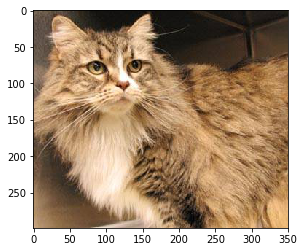

In [3]:
dataset = DogCatTrainDataset(data_path='data/train/*.jpg', transform=None)
img , label = dataset[100]
print(label)
plt.imshow(np.asarray(img))
plt.show()

# Define Data Loader 

In [4]:
def load_train_data(data_path, batch_size):
    dataset = DogCatTrainDataset
    data_loader = DataLoader(
        dataset(data_path,
               transform=transforms.Compose([
                   transforms.Resize((224, 224)),
                   transforms.ToTensor()
               ])),
        batch_size=batch_size, shuffle = True, num_workers=4)
    return data_loader 

# Check Data Loader

In [5]:
loader = load_train_data(data_path='data/train/*.jpg', batch_size=2)
image_batch, label_batch = next(loader.__iter__())
print(image_batch.shape)
print(label_batch.shape)

torch.Size([2, 3, 224, 224])
torch.Size([2])


# Custom Transforms

In [6]:
class Posterize(object):
    """Call PIL Posterize."""
    def __init__(self, bits):
        assert isinstance(bits, (int))
        self.bits = bits
        
    def __call__(self, image):
        return ImageOps.posterize(image, self.bits)

# Check Transforms

0


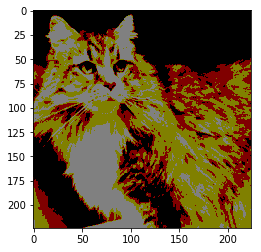

In [7]:
dataset = DogCatTrainDataset(data_path='data/train/*.jpg',
                             transform=transforms.Compose([
                                 transforms.Resize((224, 224)),
                                 Posterize(1)]))
img , label = dataset[100]
print(label)
plt.imshow(np.asarray(img))
plt.show()